## Train x-modalix example

In [11]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [12]:
os.getcwd()

'/Users/maximilianjoas/development/autoencodix_package/notebooks'

In [13]:
import os
from autoencodix.configs.default_config import DataConfig, DataInfo, DefaultConfig
from autoencodix.configs.xmodalix_config import XModalixConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = XModalixConfig(
    checkpoint_interval=25,
	loss_reduction = "sum",
    class_param="early",
    epochs=4,
    pretrain_epochs=0,
	beta = 0.001,
	gamma= 1.5,
    # gamma= 0,
	delta_class= 0,
    requires_paired=False,
	delta_pair = 1,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=32,
    batch_size=32,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=5,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

Given image size is possible, rescaling images to: 64x64


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:226: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_path, sep=sep, index_col=0)
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:226: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_path, sep=sep, index_col=0)


Successfully loaded 260 images for IMG
anno key: RNA
anno key: IMG
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...
key: train, type: <class 'dict'>
key: valid, type: <class 'dict'>
key: test, type: <class 'dict'>
Check if we need to pretrain: multi_bulk.RNA
pretrain epochs : 0
No pretraining for multi_bulk.RNA
Check if we need to pretrain: img.IMG
pretrain epochs : 5
Starting Pretraining for: img.IMG with <class 'autoencodix.trainers._general_trainer.GeneralTrainer'>


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/data/_filter.py:102: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Epoch 1 - Train Loss: 283.1024
Sub-losses: recon_loss: 283.1021, var_loss: 0.0003, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 398.4296
Sub-losses: recon_loss: 398.4296, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 56.8161
Sub-losses: recon_loss: 56.7941, var_loss: 0.0221, anneal_factor: 0.0067, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 345.9504
Sub-losses: recon_loss: 345.9338, var_loss: 0.0166, anneal_factor: 0.0067, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 28.2546
Sub-losses: recon_loss: 27.4880, var_loss: 0.7666, anneal_factor: 0.5000, effective_beta_factor: 0.0005
Epoch 3 - Valid Loss: 282.1753
Sub-losses: recon_loss: 281.5249, var_loss: 0.6503, anneal_factor: 0.5000, effective_beta_factor: 0.0005
Epoch 4 - Train Loss: 24.2002
Sub-losses: recon_loss: 23.3339, var_loss: 0.8663, anneal_factor: 0.9933, effective_beta_factor: 0.0010
Epoch 4 - Valid Loss: 102.9224
Sub-losses: recon_loss:

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [14]:
# list(xmodalix.result.sample_ids.get(epoch=-1, split="test")['translation']).index('T_34')

Creating plots ...


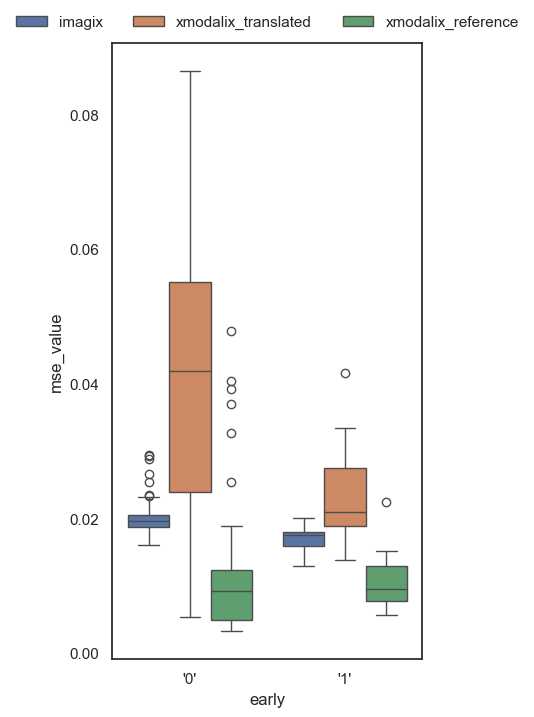

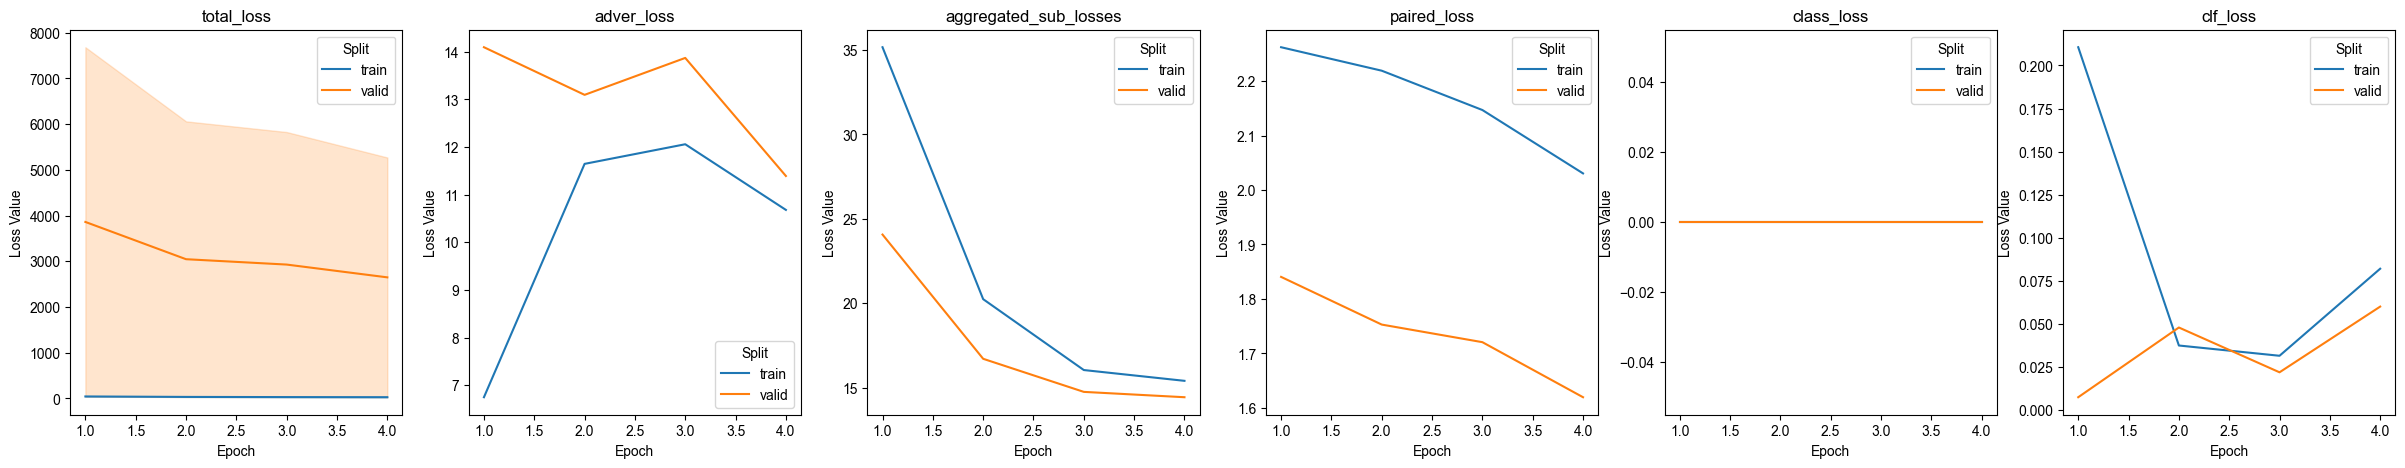

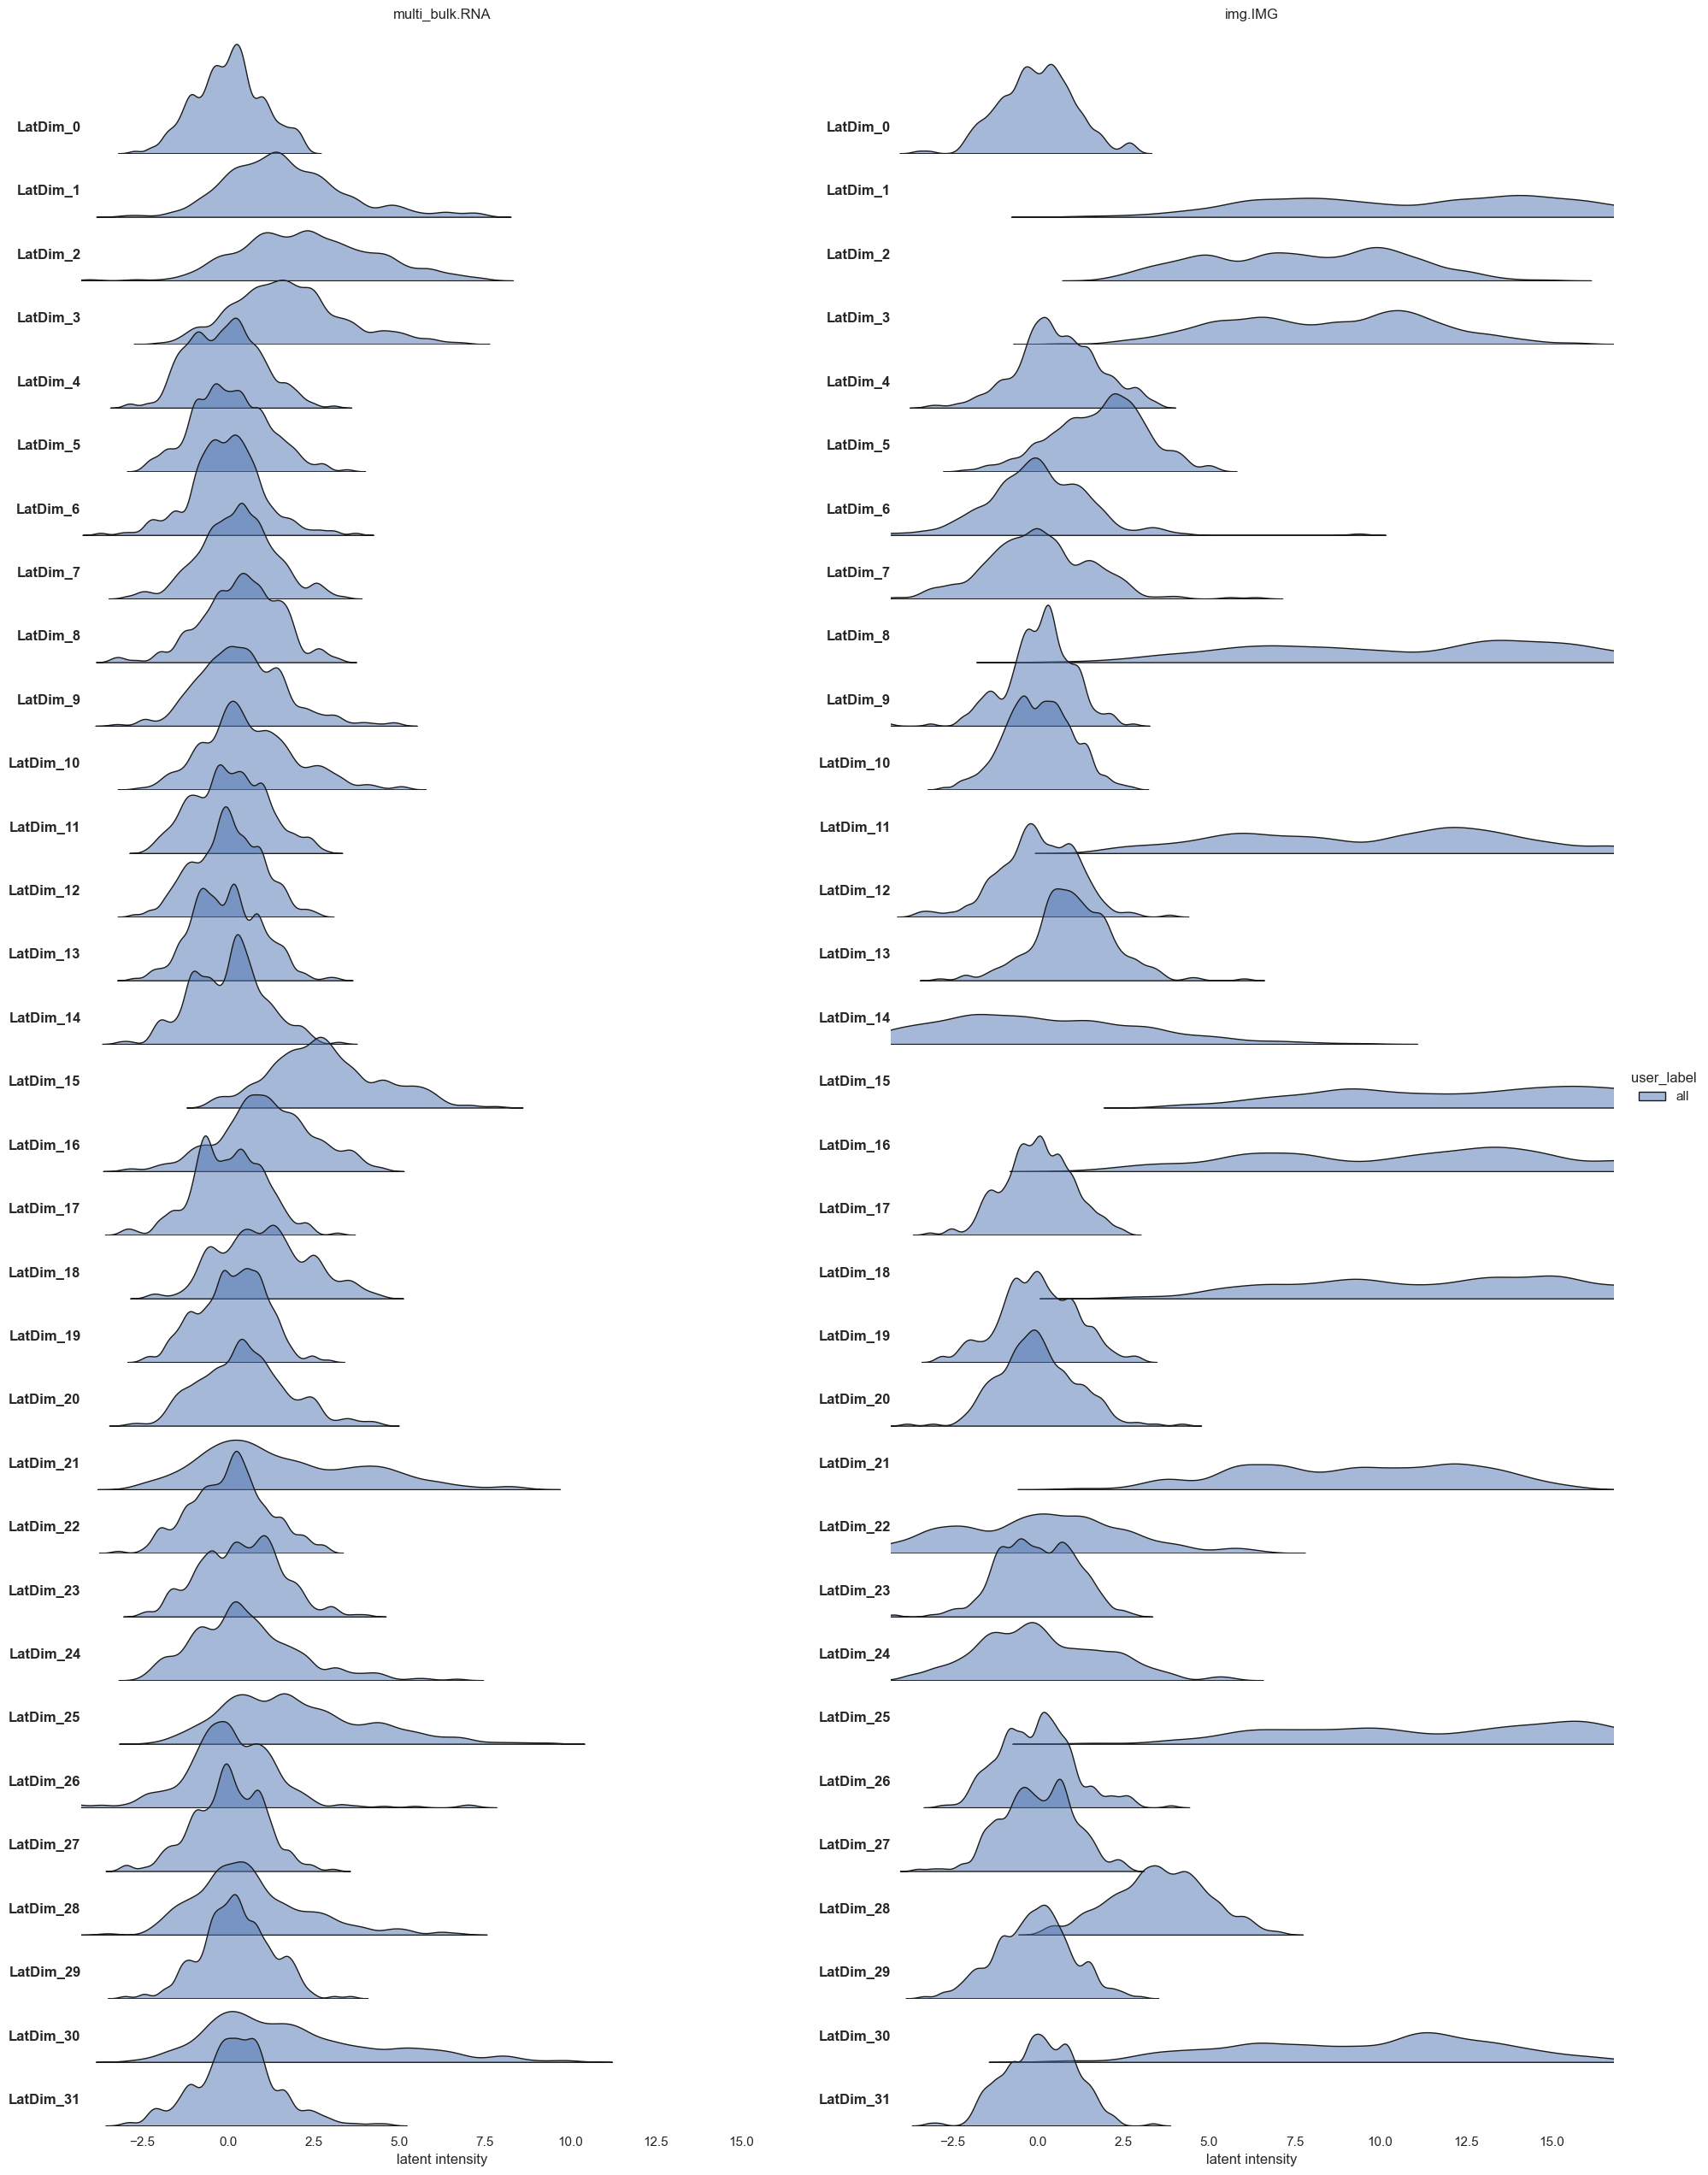

Index([    nan, 'T_100', 'T_129', 'T_101',  'T_27', 'T_115',  'T_25',  'T_31',
       'T_248', 'T_260',
       ...
       'T_145',  'T_49', 'T_147',  'T_61', 'T_190', 'T_230', 'T_243',  'T_28',
       'T_124', 'T_246'],
      dtype='object', name='sample_ids', length=261)
          DIM1      DIM2 sample_ids        modality
0     1.140759  2.031138        T_1  multi_bulk.RNA
1     2.349043  2.292028       T_10  multi_bulk.RNA
2     0.366582  1.027906      T_100  multi_bulk.RNA
3    -0.158868  0.084747      T_101  multi_bulk.RNA
4     0.474785  0.599574      T_104  multi_bulk.RNA
..         ...       ...        ...             ...
515   1.713097  0.622093       T_58         img.IMG
516   9.621926  6.338573       T_61         img.IMG
517   9.031400  6.500733       T_87         img.IMG
518  10.466155  7.096347       T_94         img.IMG
519   9.014367  7.029539       T_95         img.IMG

[520 rows x 4 columns]


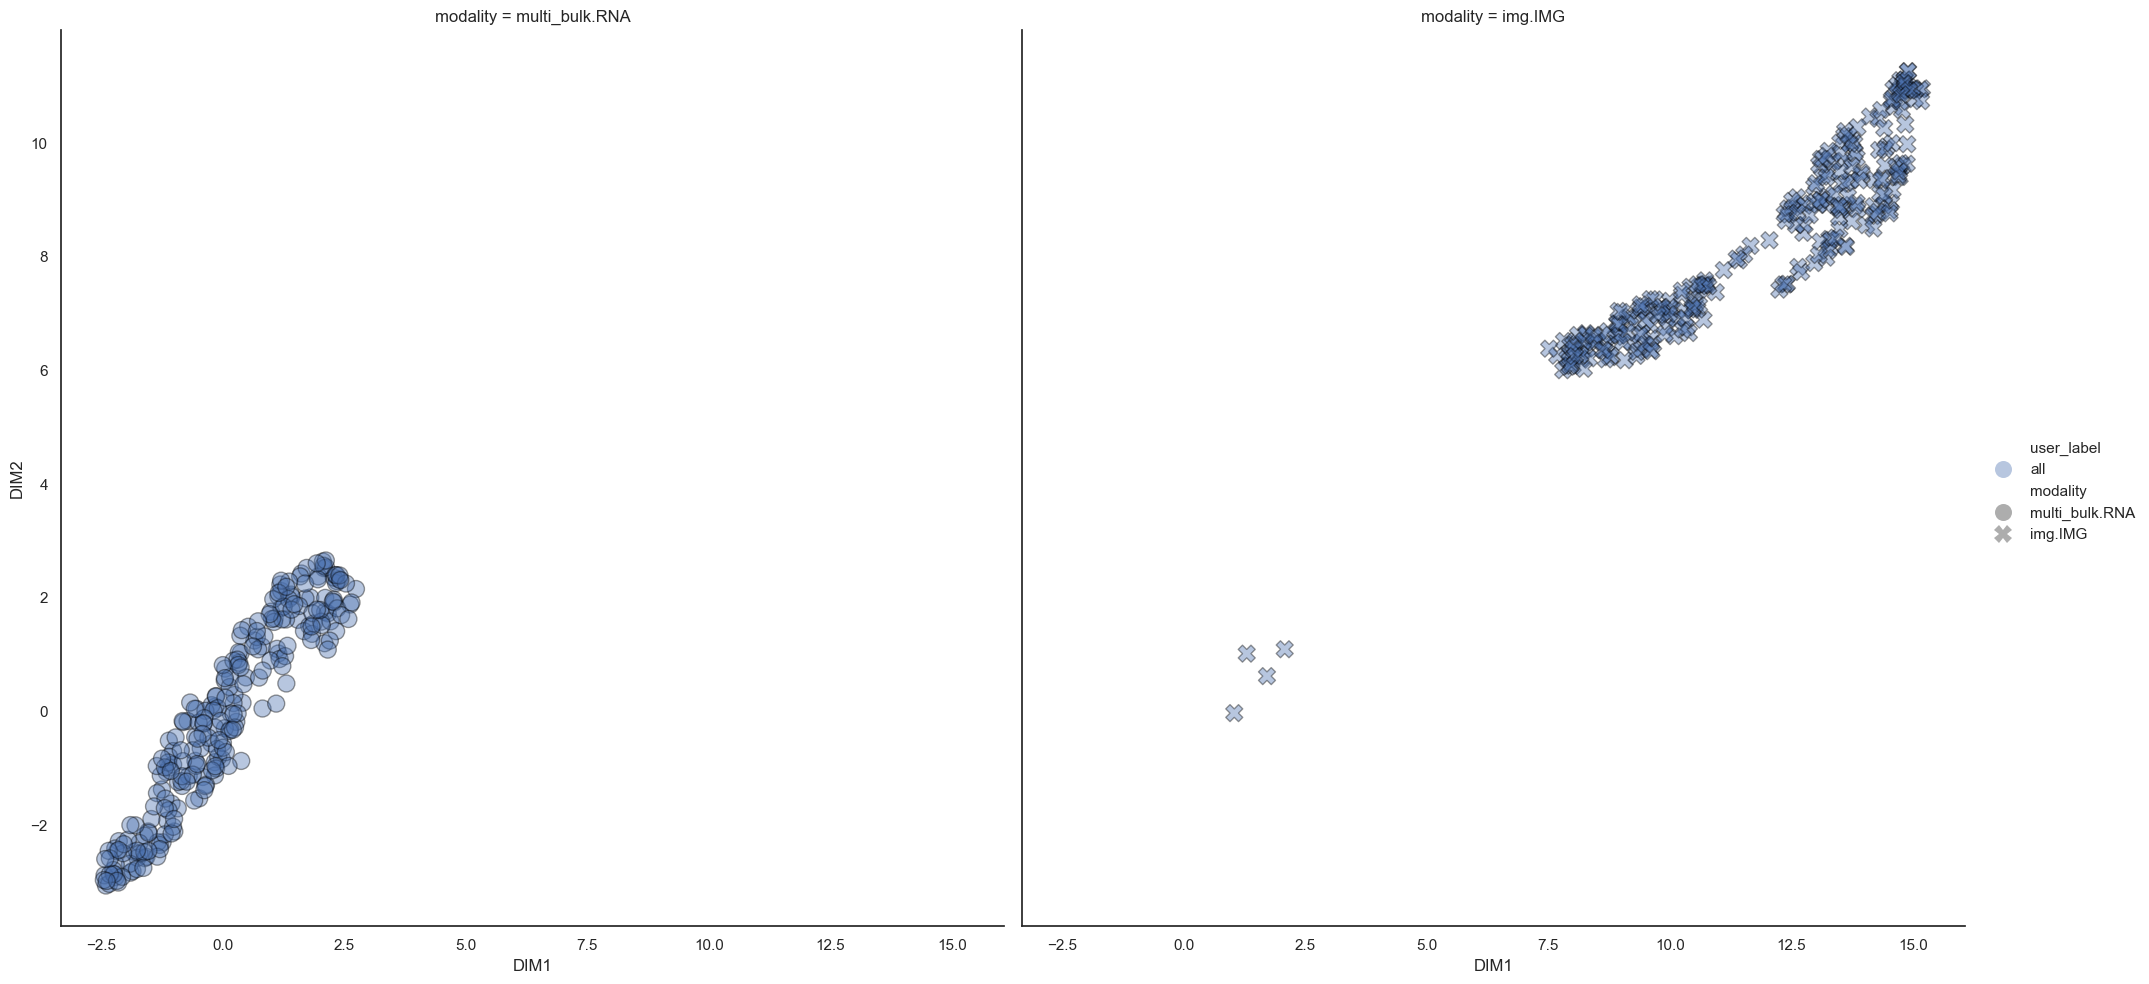

ValueError: No modality with a 'from' direction was specified in the config.

In [34]:
xmodalix.show_result()

In [16]:
to_key ="img.IMG"
print("Original test dataset size:",)
print(len(xmodalix.result.datasets.test.datasets[to_key]))

Original test dataset size:
52


In [17]:
print("Reconstructed test dataset size:",)
print(len(xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]))

Reconstructed test dataset size:
52


In [18]:
import numpy as np
print("Total sample ids")
print(len(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key]))
print("Unique sample ids")
print(len(np.unique(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key])))

Total sample ids
52
Unique sample ids
52


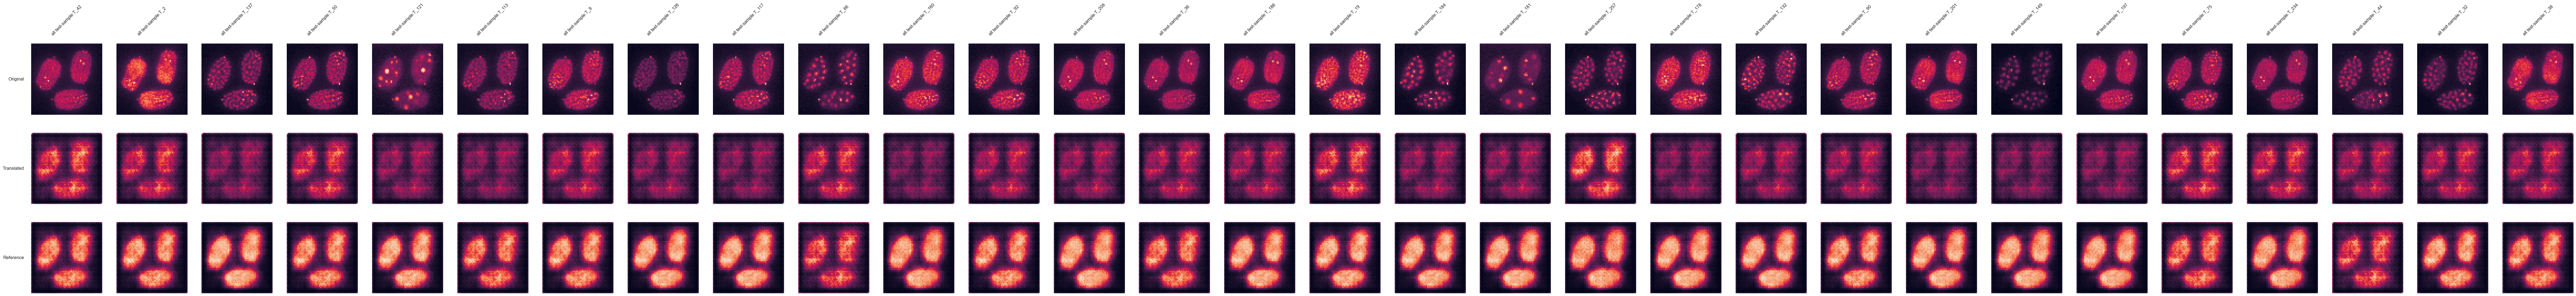

In [19]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix.visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [20]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovo'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovo'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


Perform ML task with feature df: PCA_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_multi_bulk.RNA
Perform ML task with feature df: PCA_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_img.IMG
Perform ML task with feature df: UMAP_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_multi_bulk.RNA
Perform ML task with feature df: UMAP_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing 

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: RandomFeature_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_multi_bulk.RNA_R1
RandomFeature_$_multi_bulk.RNA_R2
RandomFeature_$_multi_bulk.RNA_R3
RandomFeature_$_multi_bulk.RNA_R4
RandomFeature_$_multi_bulk.RNA_R5
Perform ML task with feature df: RandomFeature_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_img.IMG_R1
RandomFeature_$_img.IMG_R2
RandomFeature_$_img.IMG_R3
RandomFeature_$_img.IMG_R4
RandomFeature_$_img.IMG_R5
Perform ML task with feature df: Latent_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing da

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Latent_$_img.IMG
Perform ML task for target parameter: early
Perform ML task for target parameter: extra_class_labels


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [21]:
xmodalix.result.embedding_evaluation

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,MODALITY,ML_TASK,ML_SUBTASK
0,train,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
2,test,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
0,train,extra_class_labels,r2,0.999523,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,extra_class_labels,r2,0.999488,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
...,...,...,...,...,...,...,...,...,...
1,valid,early,roc_auc_ovo,0.659091,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
2,test,early,roc_auc_ovo,0.539773,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
0,train,extra_class_labels,r2,0.761092,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG
1,valid,extra_class_labels,r2,0.816653,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG


Showing plot for ML algorithm: LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='sag')


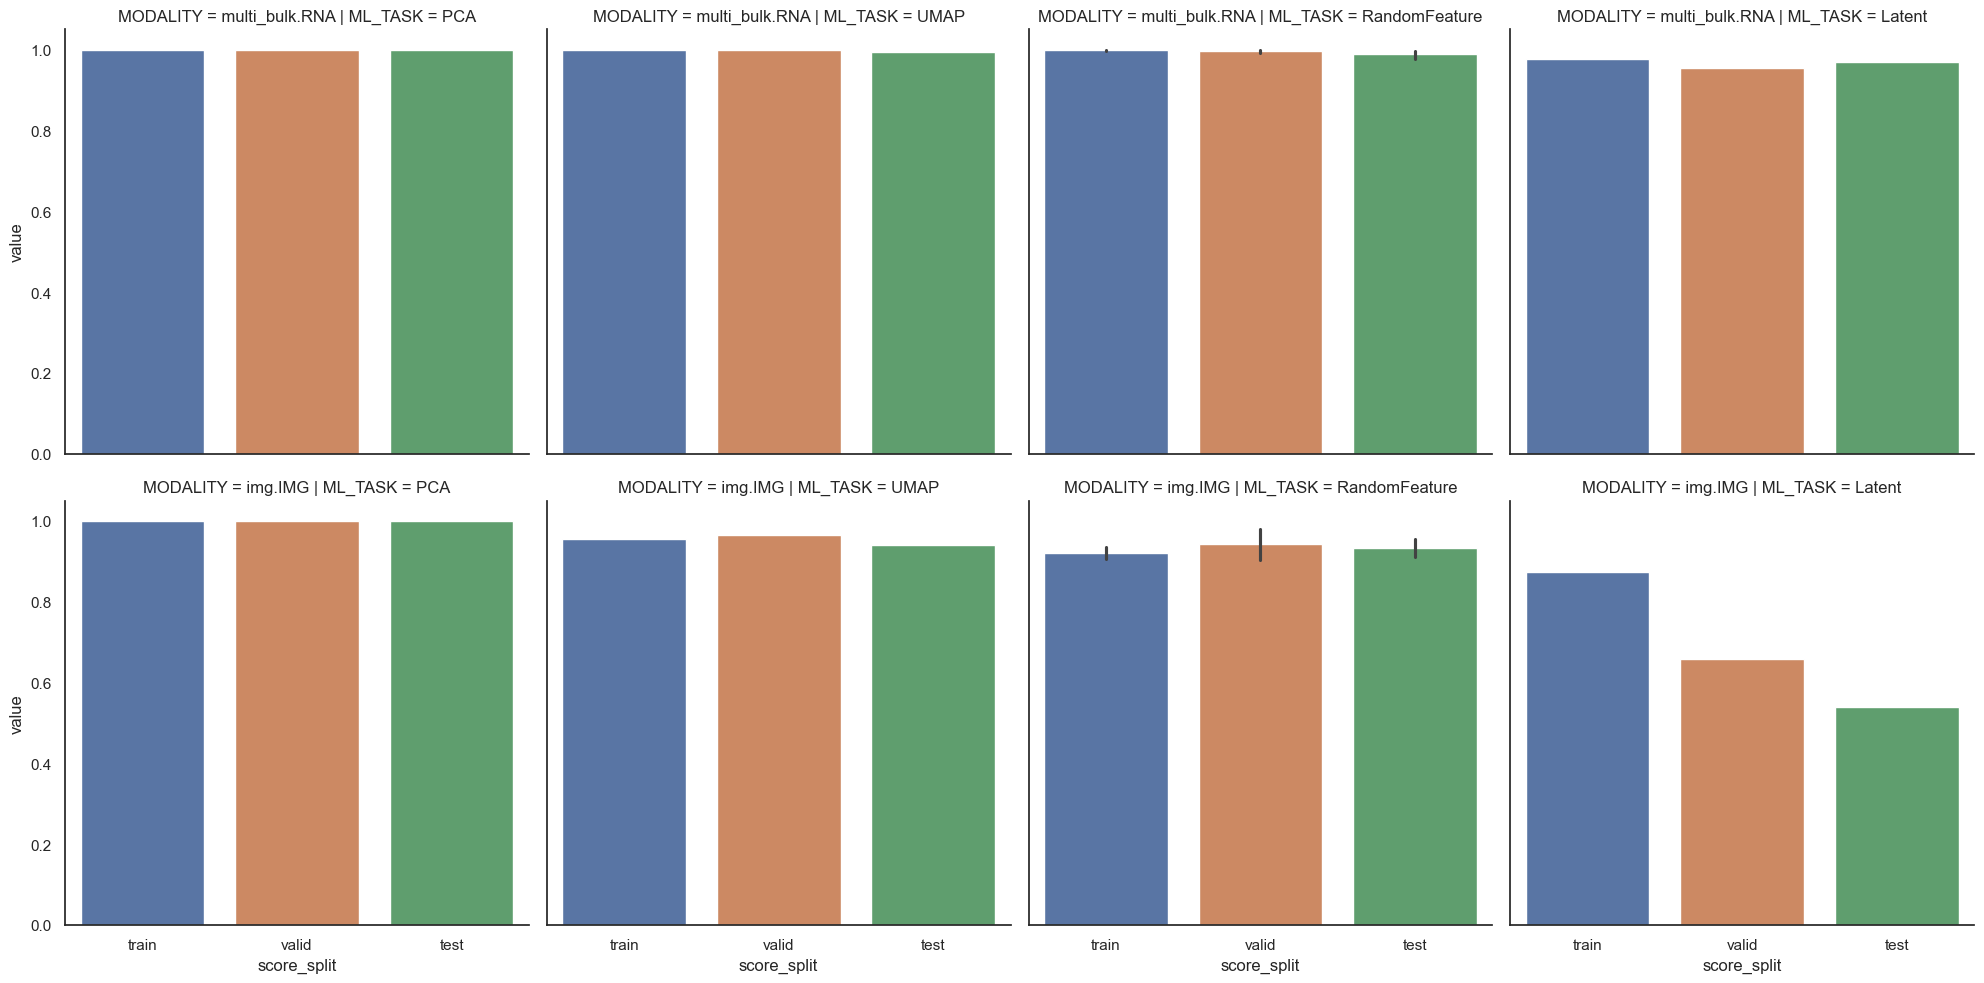

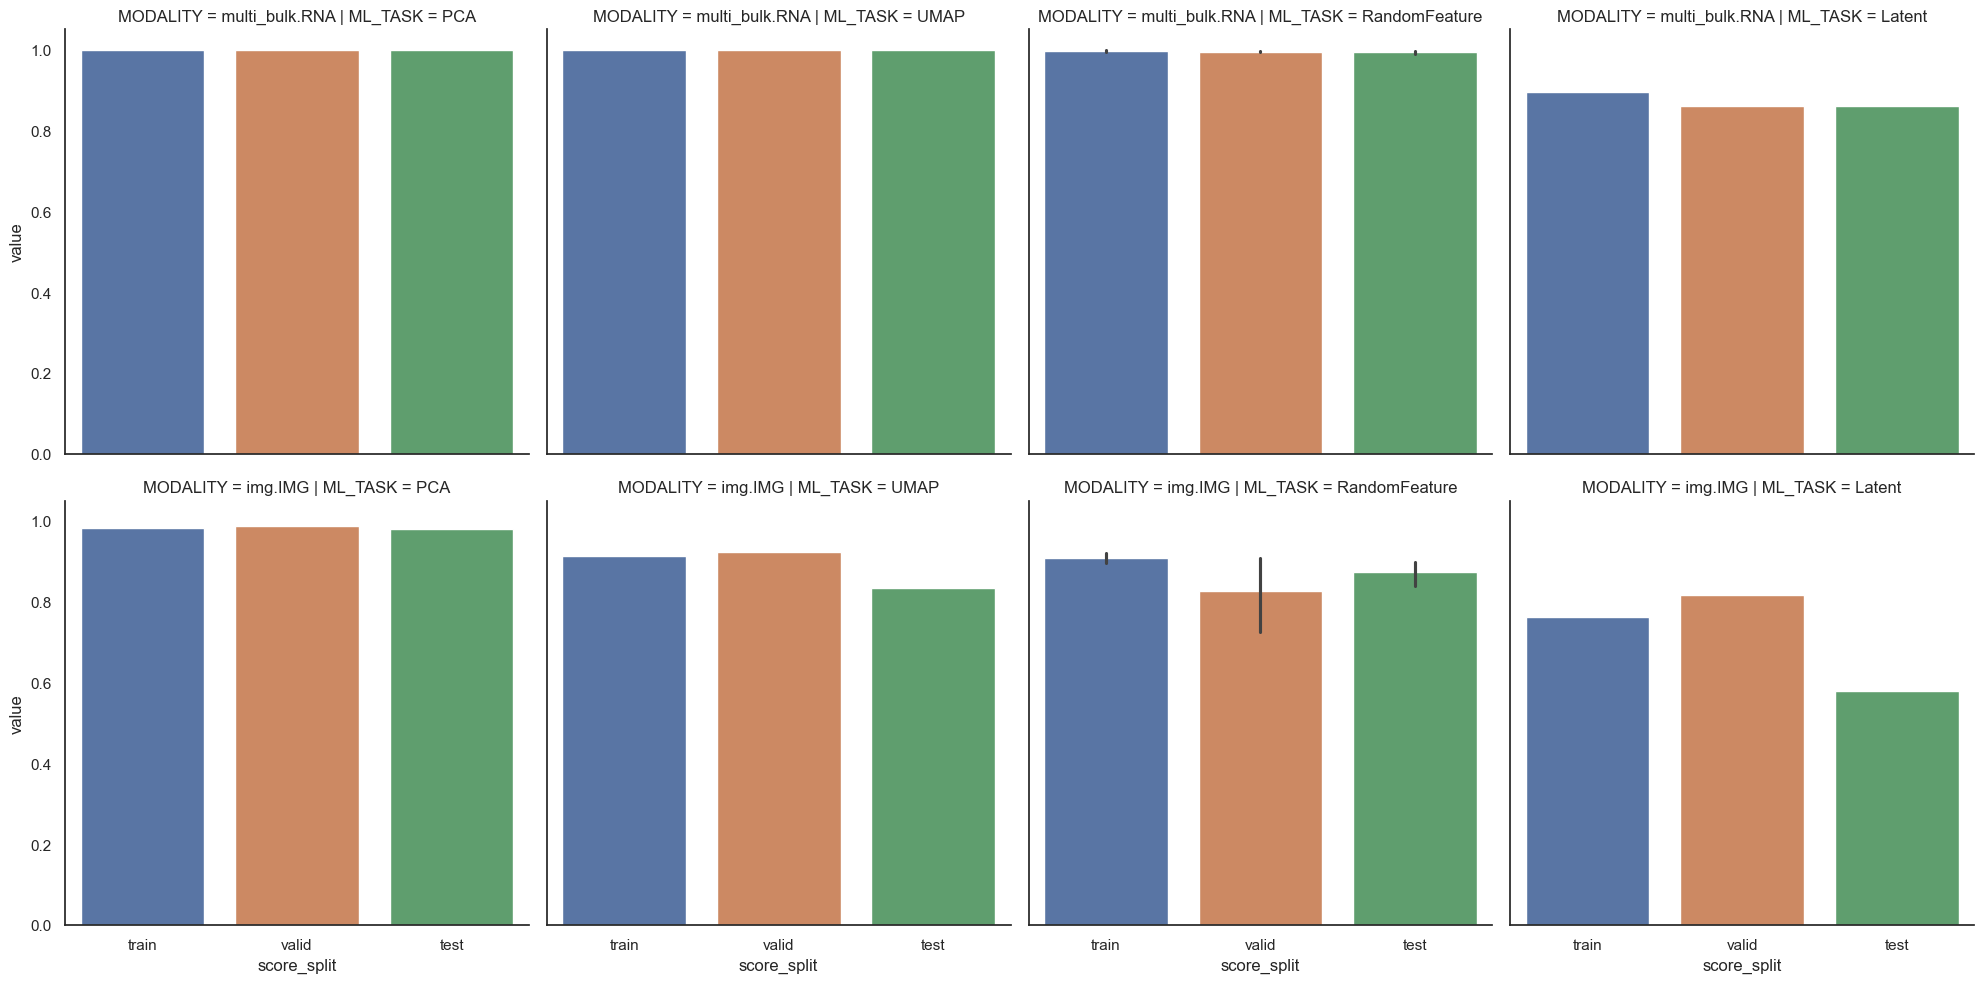

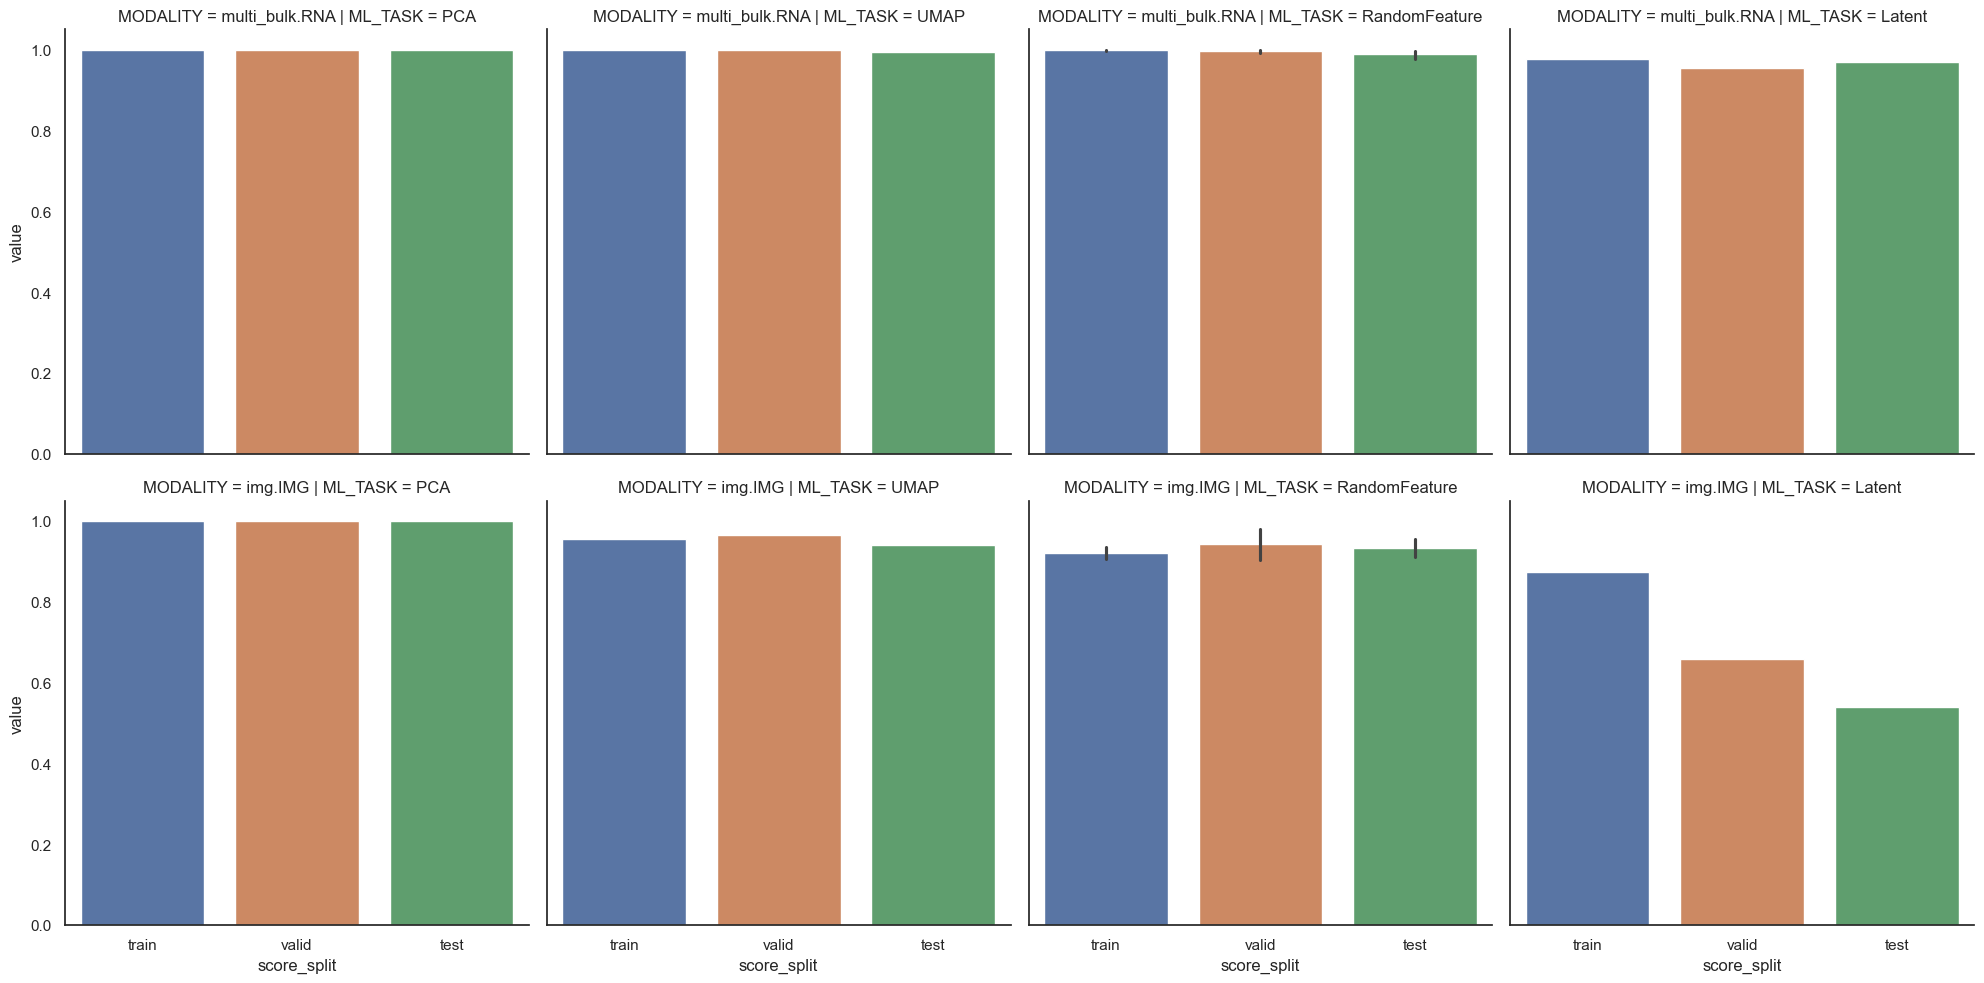

In [22]:
fig = xmodalix.visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovo"
)

## UMAP/PCA translation visualization

len of tensor-list: 52
len of tensor_ids: 52
[[ 1.0000000e-01  1.0000000e-01  1.0000000e-01 ...  1.8626451e-09
   2.5000002e-02  2.5000002e-02]
 [ 6.5217391e-02  8.6956523e-02  6.5217391e-02 ...  4.3478262e-02
   2.1739131e-02  2.1739131e-02]
 [ 2.3809522e-02  7.1428567e-02  4.7619045e-02 ... -1.8626451e-09
  -1.8626451e-09  2.3809522e-02]
 ...
 [ 2.1952282e-01  9.2203818e-02  5.0476696e-02 ...  4.6310712e-02
   5.6900200e-02  1.8560018e-01]
 [ 2.1946111e-01  9.2172675e-02  5.0410561e-02 ...  4.6403315e-02
   5.6958914e-02  1.8564343e-01]
 [ 2.1941517e-01  9.2157148e-02  5.0382122e-02 ...  4.6493012e-02
   5.6982573e-02  1.8568362e-01]]


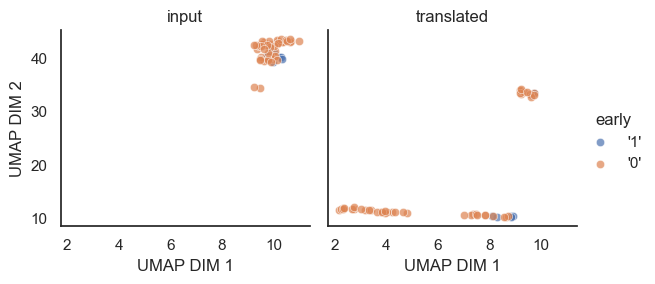

In [23]:
fig = xmodalix.visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality="img.IMG",
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

In [24]:
len(xmodalix.result.reconstructions.get(split="test", epoch=-1)["translation"])


52

In [25]:
xmodalix.result.sample_ids.get(split="test", epoch=-1)

{'multi_bulk.RNA': array(['T_103', 'T_113', 'T_114', 'T_117', 'T_121', 'T_126', 'T_131',
        'T_132', 'T_137', 'T_142', 'T_148', 'T_149', 'T_15', 'T_160',
        'T_165', 'T_169', 'T_178', 'T_181', 'T_183', 'T_184', 'T_185',
        'T_186', 'T_19', 'T_195', 'T_197', 'T_2', 'T_201', 'T_205',
        'T_208', 'T_215', 'T_224', 'T_234', 'T_237', 'T_238', 'T_242',
        'T_257', 'T_32', 'T_36', 'T_38', 'T_42', 'T_44', 'T_48', 'T_5',
        'T_50', 'T_60', 'T_63', 'T_66', 'T_75', 'T_79', 'T_9', 'T_90',
        'T_92'], dtype='<U5'),
 'img.IMG': array(['T_103', 'T_113', 'T_114', 'T_117', 'T_121', 'T_126', 'T_131',
        'T_132', 'T_137', 'T_142', 'T_148', 'T_149', 'T_15', 'T_160',
        'T_165', 'T_169', 'T_178', 'T_181', 'T_183', 'T_184', 'T_185',
        'T_186', 'T_19', 'T_195', 'T_197', 'T_2', 'T_201', 'T_205',
        'T_208', 'T_215', 'T_224', 'T_234', 'T_237', 'T_238', 'T_242',
        'T_257', 'T_32', 'T_36', 'T_38', 'T_42', 'T_44', 'T_48', 'T_5',
        'T_50', 'T_60',

## Recon error and VAE pure comparison

In [26]:
## Imagix (pure comparison)
from autoencodix.configs.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [27]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

Given image size is possible, rescaling images to: 64x64
Successfully loaded 260 images for IMG
calling normalize image in _process_ing_to_img_case
anno key: IMG
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...
Epoch 1 - Train Loss: 600.1637
Sub-losses: recon_loss: 592.6441, var_loss: 7.5196, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 494.1977
Sub-losses: recon_loss: 494.1972, var_loss: 0.0005, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 410.4529
Sub-losses: recon_loss: 406.4718, var_loss: 3.9810, anneal_factor: 0.0067, effective_beta_factor: 0.0001
Epoch 2 - Valid Loss: 331.3591
Sub-losses: recon_loss: 329.9790, var_loss: 1.3801, anneal_factor: 0.0067, effective_beta_factor: 0.0001
Epoch 3 - Train Loss: 242.5828
Sub-losses: recon_loss: 241.4627, var_loss: 1.1200, anneal_factor: 0.5000, effective_beta_factor: 0.0050
Epoch 3 - 

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: ImageVAEArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._image_dataset.ImageDataset object at 0x14c743680>, valid=<autoencodix.data._image_dataset.ImageDataset object at 0x14f1764e0>, test=<autoencodix.data._image_dataset.ImageDataset object at 0x14e03be00>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 52 × 32
    uns: 'var_names'
final_reconstruction: <autoencodix

Creating plots ...


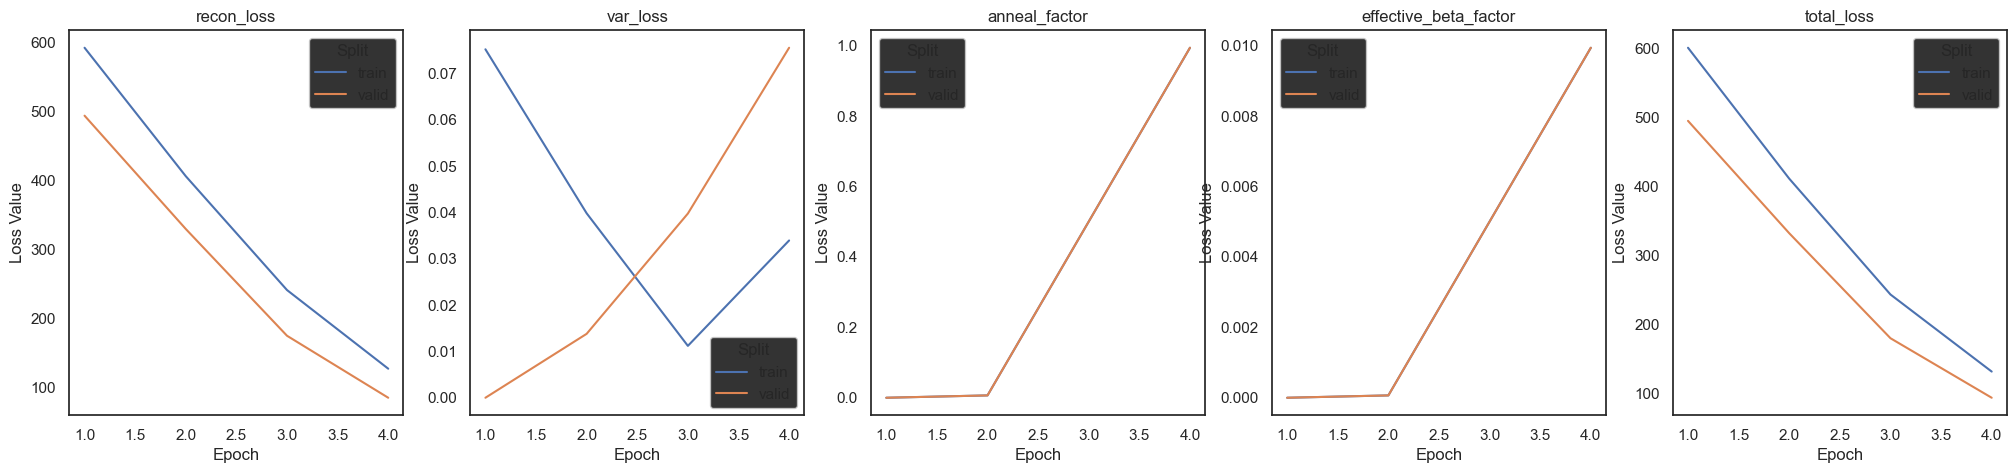

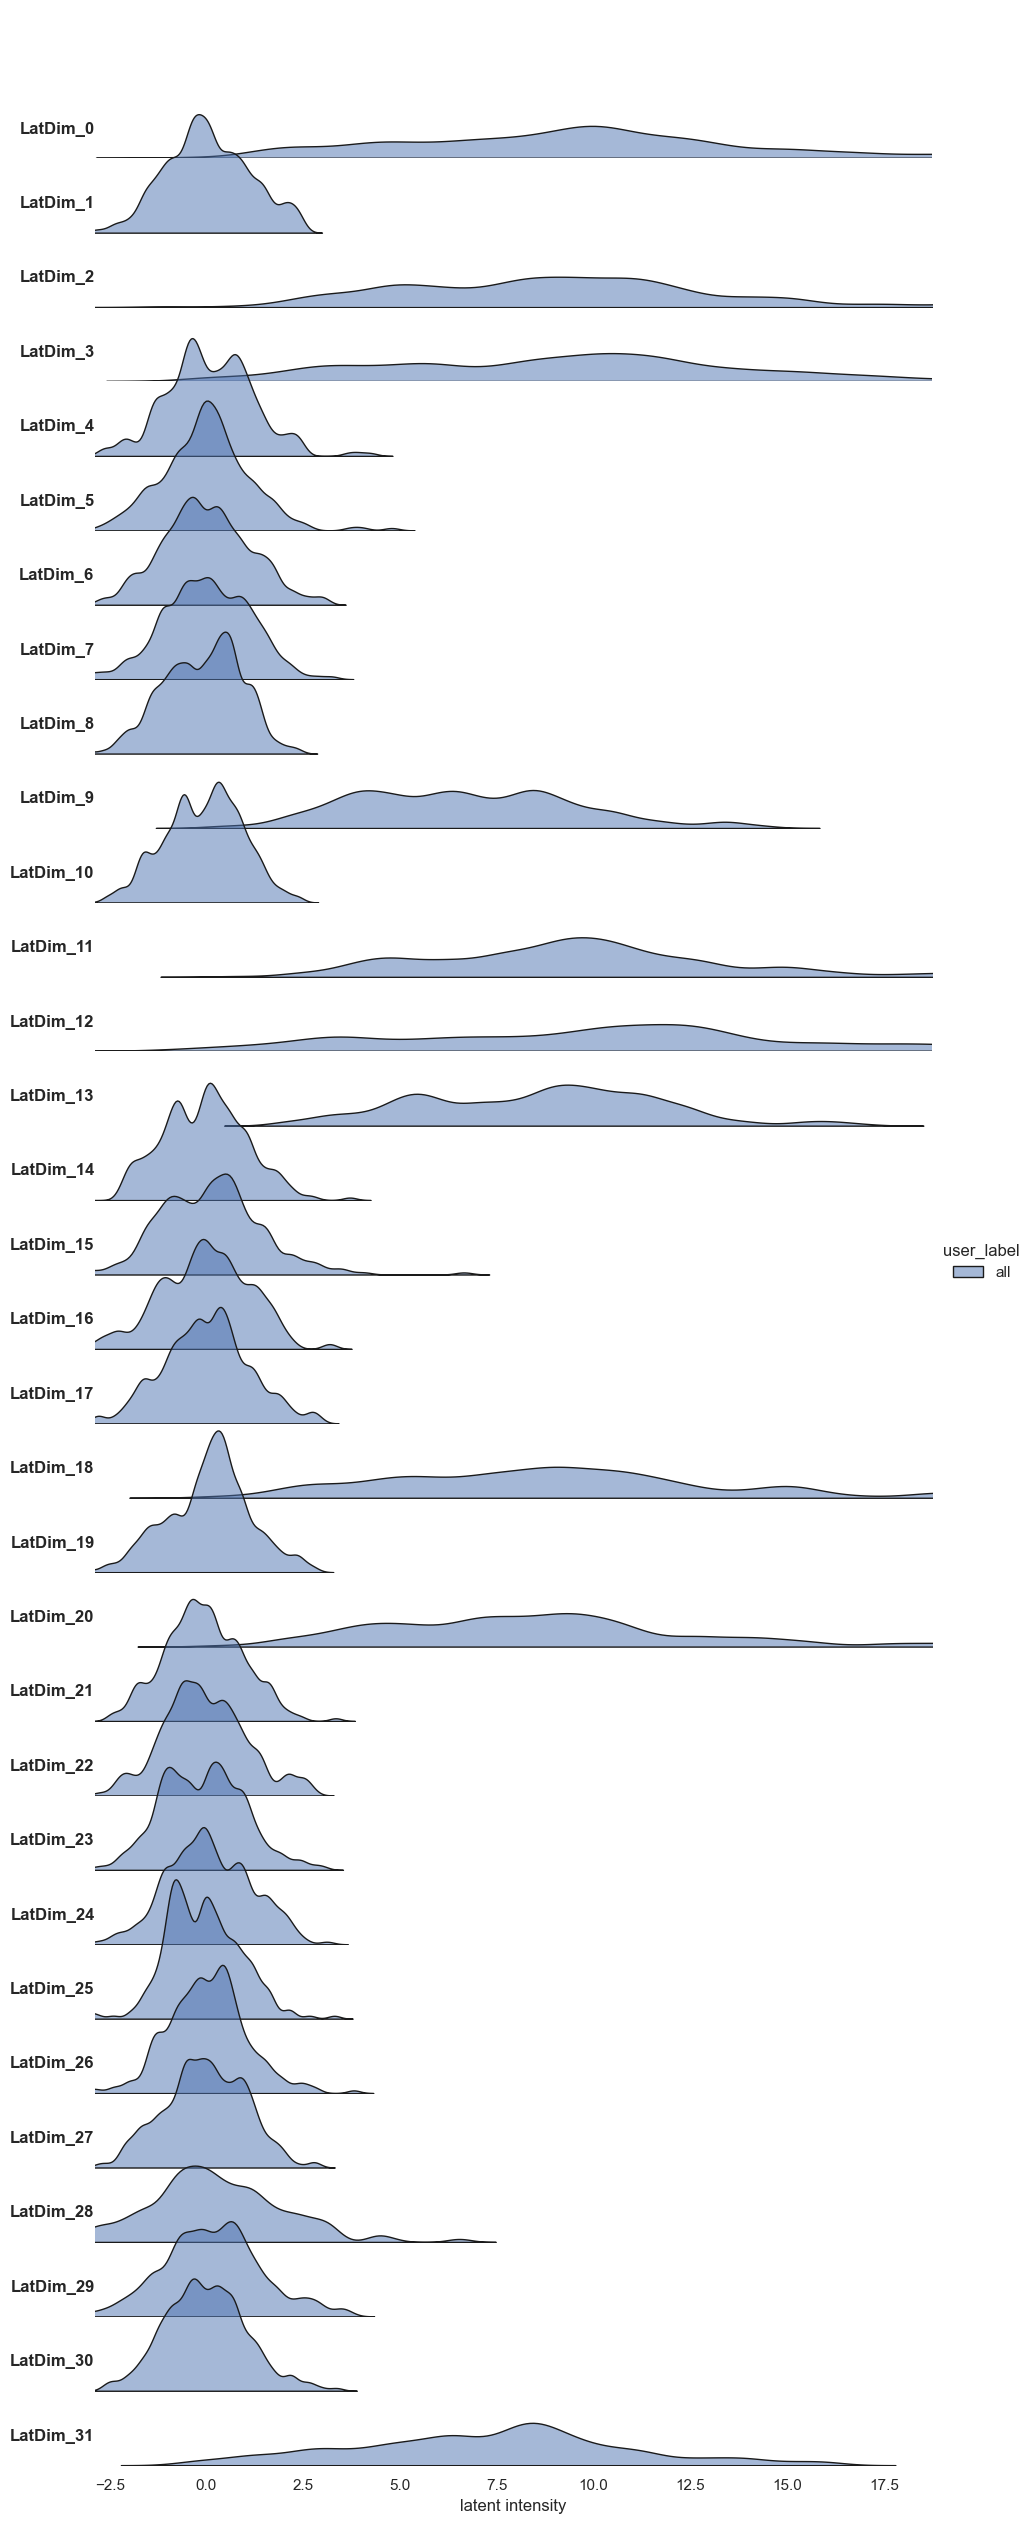

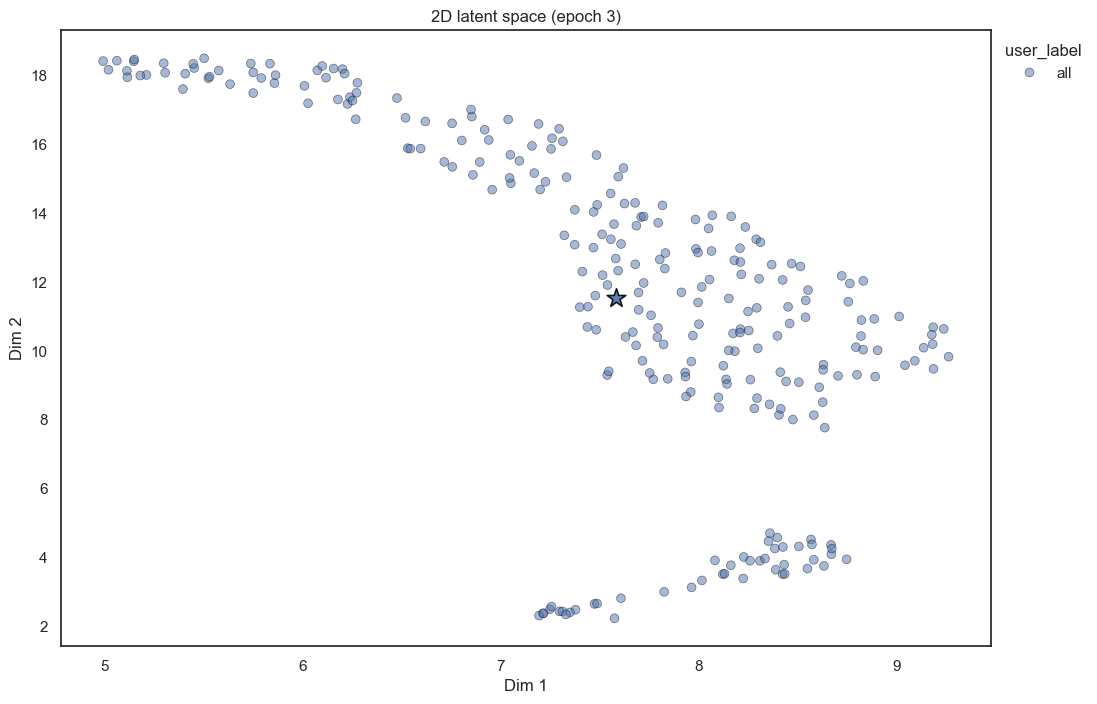

In [28]:
imagix.show_result()

In [29]:
# n_samples = 3
imagix.result.datasets.test.sample_ids

['T_32',
 'T_114',
 'T_117',
 'T_19',
 'T_248',
 'T_36',
 'T_79',
 'T_92',
 'T_201',
 'T_215',
 'T_44',
 'T_148',
 'T_149',
 'T_159',
 'T_9',
 'T_165',
 'T_206',
 'T_212',
 'T_42',
 'T_68',
 'T_40',
 'T_97',
 'T_238',
 'T_205',
 'T_82',
 'T_198',
 'T_195',
 'T_181',
 'T_234',
 'T_208',
 'T_5',
 'T_169',
 'T_182',
 'T_237',
 'T_197',
 'T_183',
 'T_178',
 'T_63',
 'T_49',
 'T_184',
 'T_224',
 'T_60',
 'T_74',
 'T_2',
 'T_121',
 'T_257',
 'T_256',
 'T_242',
 'T_240',
 'T_137',
 'T_15',
 'T_126']

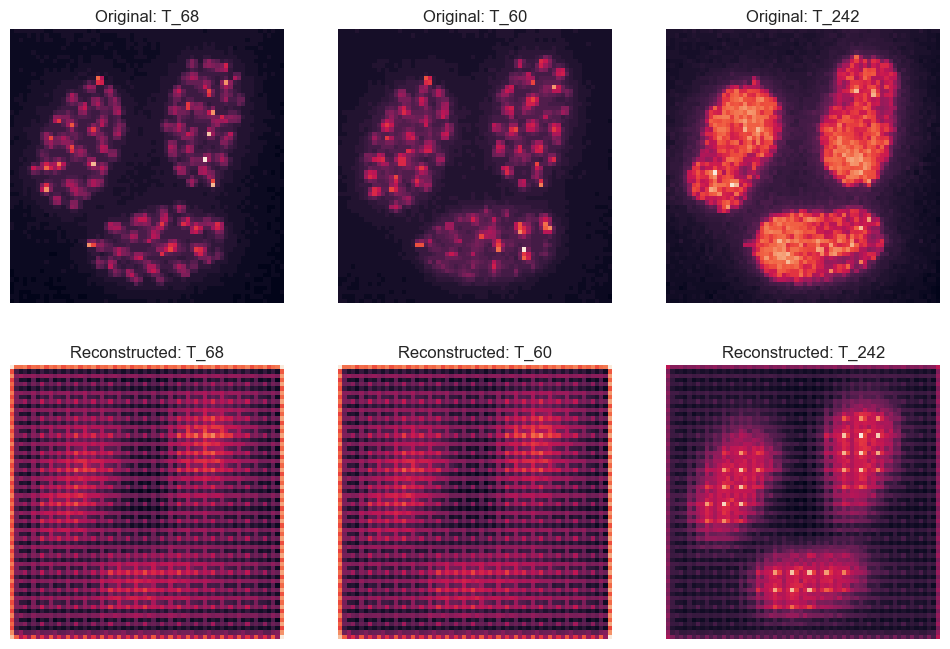

In [30]:
imagix.visualizer.show_image_recon_grid(result=imagix.result)

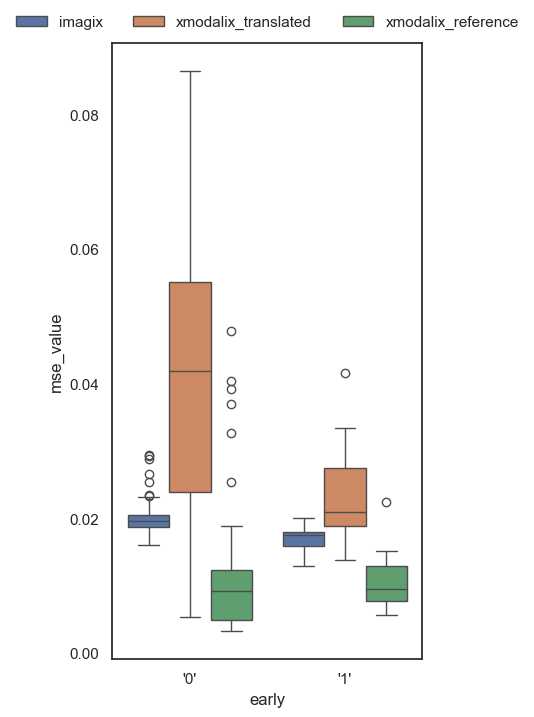

In [31]:
param = "early"
fig, df_comparison = xmodalix.evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix.visualizer.plots["PureVAEComparison"][param] = fig
fig.figure